# 6.6 Sourcing & Analyzing Time Series Data

### This script contains the following:

#### Importing libraries and data
#### Subsetting, wrangling, and cleaning time-series data
#### Time series analysis: decomposition
#### Testing for stationarity
#### Stationarizing the Federal Reserve Economic Data

## Importing libraries and data

In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm 
import os
import warnings 
warnings.filterwarnings("ignore") 
plt.style.use('fivethirtyeight') 

In [2]:
# API key 

quandl.ApiConfig.api_key = 'ryn1ejU4FfMZU-FX91zB'

In [3]:
# Since the data from Quandl is mostly from the US the most relatable variable would be GDP that I analyze.

data = quandl.get('FRED/GDP')

In [4]:
data. head()

,Value
Date,
1947-01-01,243.164
1947-04-01,245.968
1947-07-01,249.585
1947-10-01,259.745
1948-01-01,265.742


In [5]:
data.shape

(300, 1)

In [6]:
data.columns

Index(['Value'], dtype='object')

In [7]:
type(data)

pandas.core.frame.DataFrame

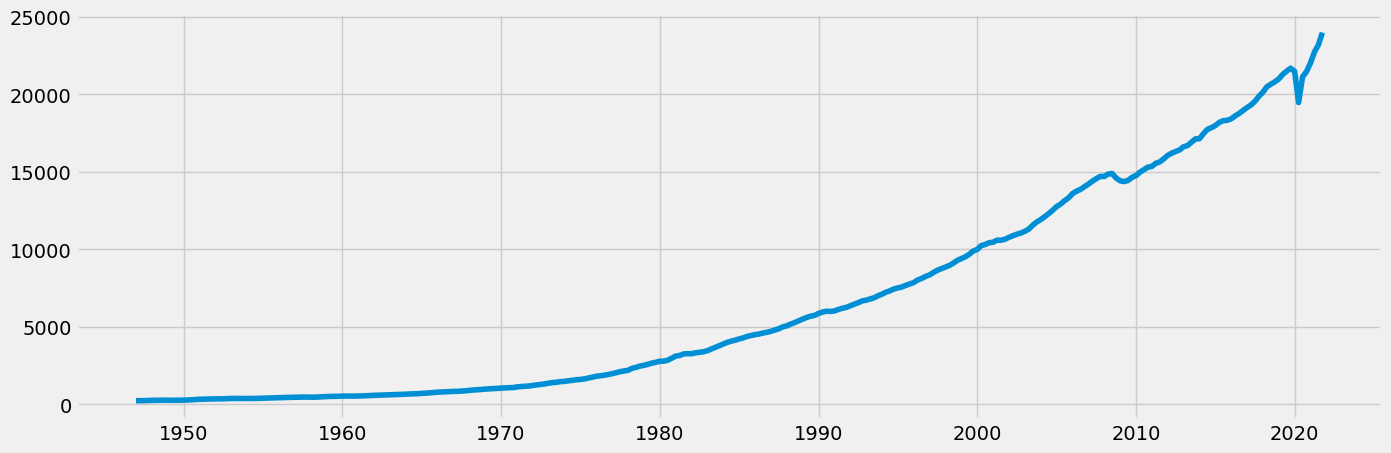

In [8]:
# creating an image of the data to visualize tendencies

plt.figure(figsize=(15,5), dpi=100) 
plt.plot(data)

We can notice in the chart a steep growth in the last year, we can see that further in th analysis we would need to standarize

## Subsetting, wrangling, and cleaning time-series data

In [9]:
# We have to reset the index to use the "Date" column as a filter

data_2 = data.reset_index()

In [10]:
data_2.head()

,Date,Value
0,1947-01-01,243.164
1,1947-04-01,245.968
2,1947-07-01,249.585
3,1947-10-01,259.745
4,1948-01-01,265.742


In [11]:
data_2.tail()

,Date,Value
295,2020-10-01,21477.597
296,2021-01-01,22038.226
297,2021-04-01,22740.959
298,2021-07-01,23202.344
299,2021-10-01,23992.355


In [12]:
# Now we will clean the data since we dont need no relevant years we will keep data starting in 1985

data_sub = data_2.loc[(data_2['Date'] >= '1985-01-01') & (data_2['Date'] < '2021-01-01')]

In [13]:
data_sub.shape

(144, 2)

In [14]:
data_sub.head()

,Date,Value
152,1985-01-01,4230.168
153,1985-04-01,4294.887
154,1985-07-01,4386.773
155,1985-10-01,4444.094
156,1986-01-01,4507.894


In [15]:
# Set the "Date" column as the index

from datetime import datetime

data_sub['datetime'] = pd.to_datetime(data_sub['Date']) # Create a datetime column from "Date.""
data_sub = data_sub.set_index('datetime') # Set the datetime as the index of the dataframe.
data_sub.drop(['Date'], axis=1, inplace=True) # Drop the "Date" column.
data_sub.head()

,Value
datetime,
1985-01-01,4230.168
1985-04-01,4294.887
1985-07-01,4386.773
1985-10-01,4444.094
1986-01-01,4507.894


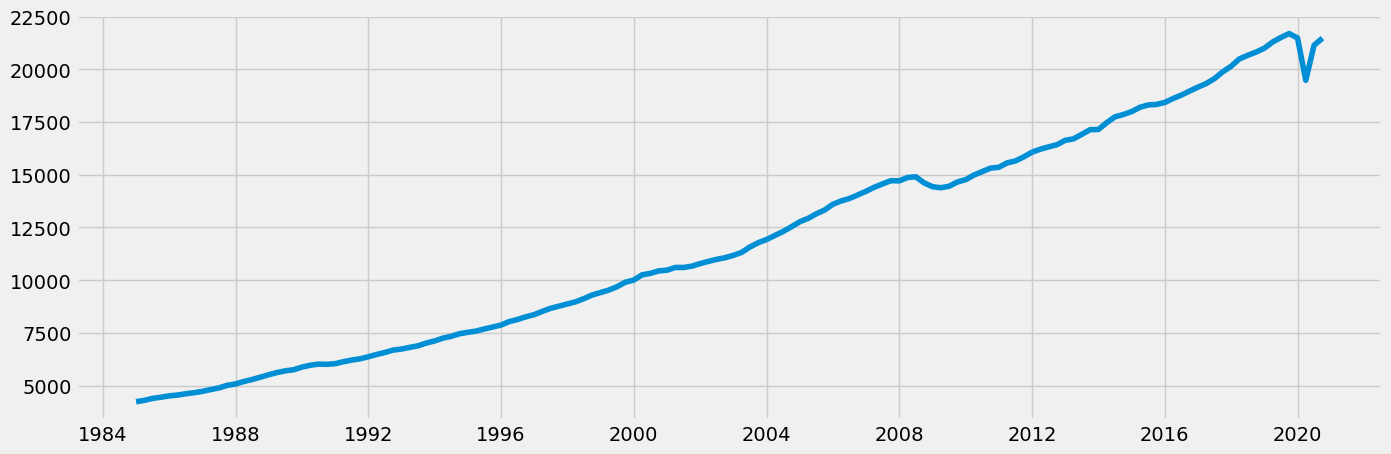

In [16]:
# Plot the new data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_sub)

In [17]:
# Check for missing values

data_sub.isnull().sum() 

Value    0
dtype: int64

In [18]:
# Check for duplicates

dups = data_sub.duplicated()
dups.sum()

0

## Time series analysis: decomposition

In [19]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(data_sub, model='additive')

In [20]:
# This will define a fixed size for all the charts.

from pylab import rcParams 

rcParams['figure.figsize'] = 18, 7

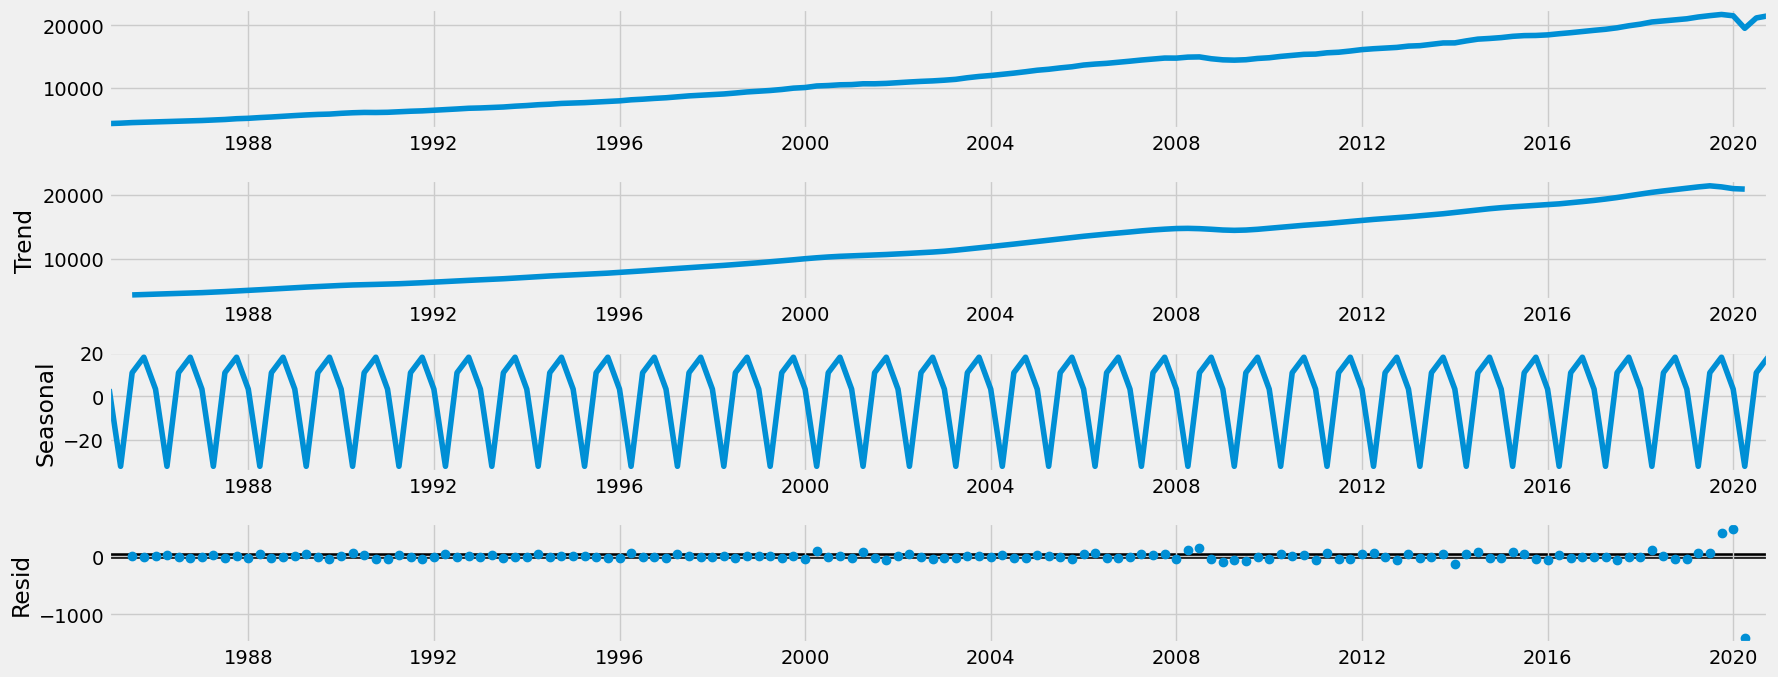

In [21]:
# Plot the separate components

decomposition.plot()
plt.show()

Because we are working with data that doesn’t have much noise the level and trend appear the same. There was not fluctuations that aren’t explained by the trend.

The overall trend continues to increase all the way until the present year having a dominant trend, the only fluctuation is at the end that most likely was cause by the pandemia.

The third component is the seasonality. 

The “residual.” Doesn't show deviations is consistent despite the data at the end that we know was created by the pandemia.

## Testing for Stationarity

In [32]:
from statsmodels.tsa.stattools import adfuller

def dickey_fuller(timeseries):
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# test using the function on the time series
dickey_fuller(data_sub['Value'])

Dickey-Fuller Stationarity test:
Test Statistic                   1.351662
p-value                          0.996883
Number of Lags Used              2.000000
Number of Observations Used    141.000000
Critical Value (1%)             -3.477601
Critical Value (5%)             -2.882266
Critical Value (10%)            -2.577822
dtype: float64


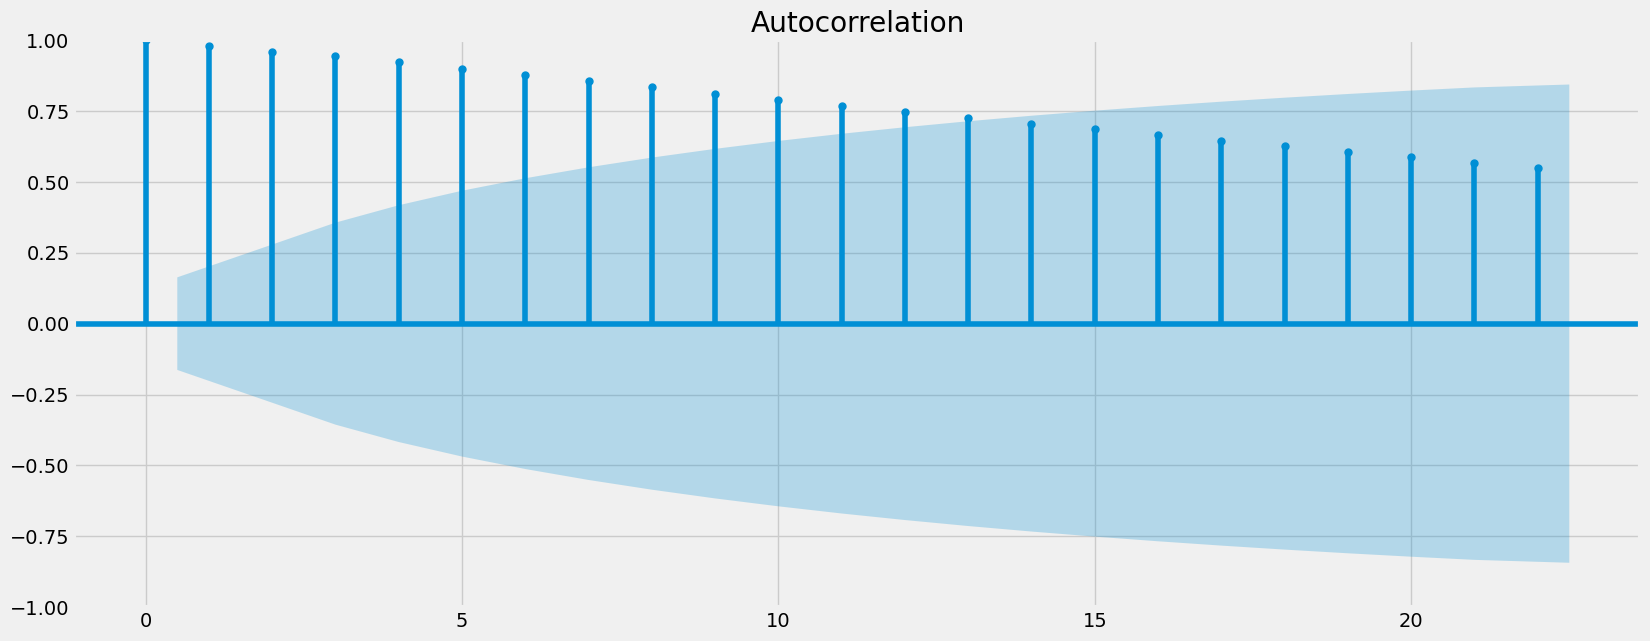

In [33]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(data_sub)
plt.show()

We can see the data is no stationary so we will need to change this in order to keep analyzing

 ## Stationarizing the Federeal reserve Economic Data

In [34]:
# The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

data_diff = data_sub - data_sub.shift(1)

In [28]:
data_diff.head()

,Value
datetime,
1985-01-01,NaN
1985-04-01,64.719
1985-07-01,91.886
1985-10-01,57.321
1986-01-01,63.800


In [26]:
data_diff.isnull().sum() 

Value    1
dtype: int64

In [35]:
#Replacing null items with the mean

data_diff['Value'].fillna(data_diff['Value'].mean(),inplace=True)

In [36]:
data_diff.isnull().sum() 

Value    0
dtype: int64

In [29]:
data_diff.columns

Index(['Value'], dtype='object')

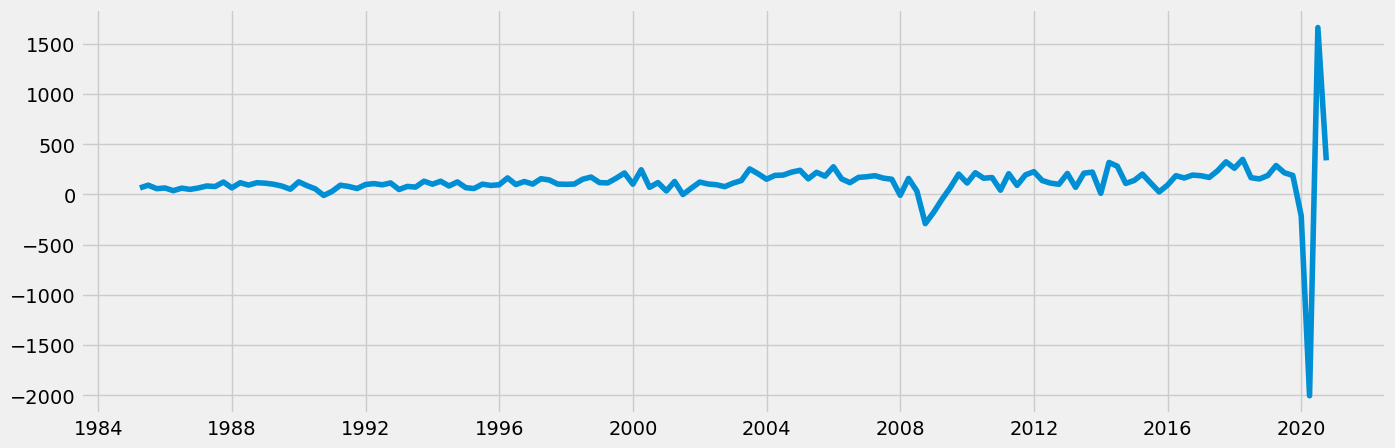

In [30]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [37]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                -1.000902e+01
p-value                        1.799204e-17
Number of Lags Used            1.000000e+00
Number of Observations Used    1.420000e+02
Critical Value (1%)           -3.477262e+00
Critical Value (5%)           -2.882118e+00
Critical Value (10%)          -2.577743e+00
dtype: float64


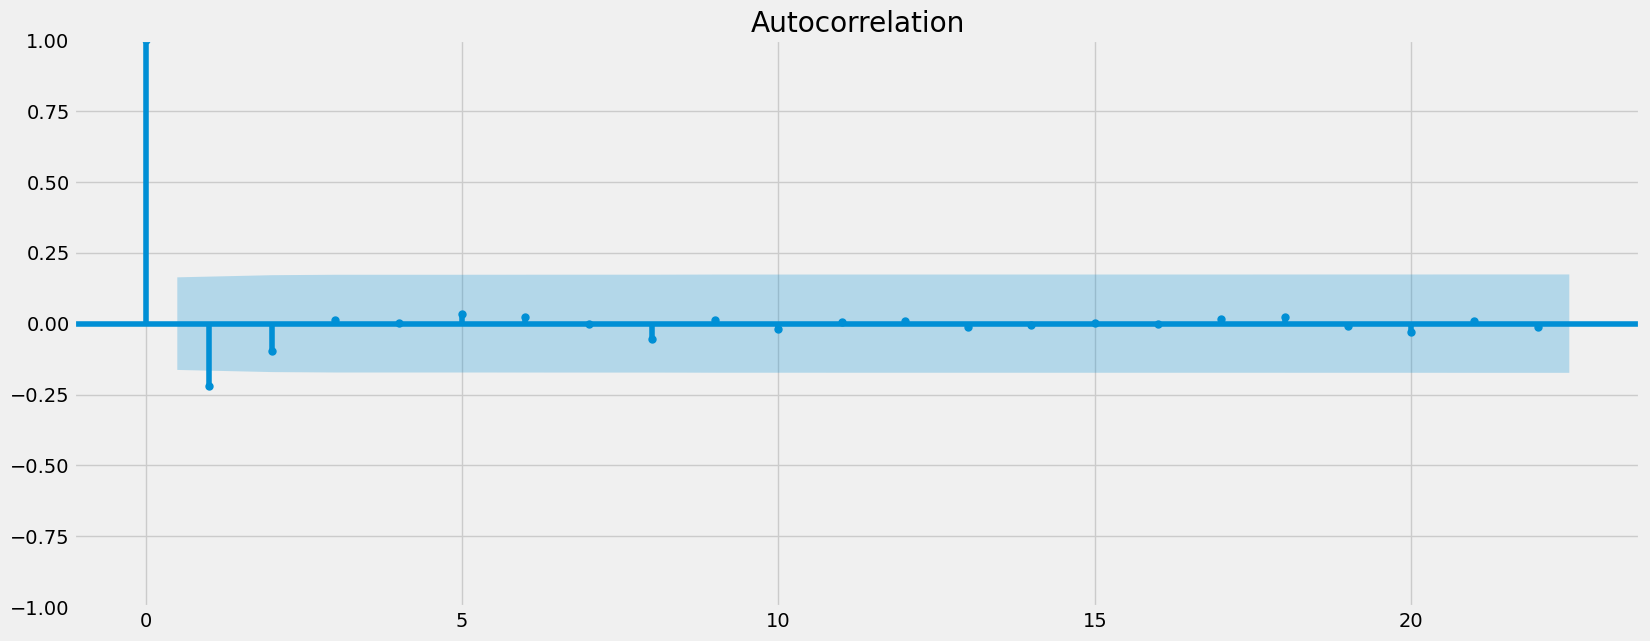

In [38]:
plot_acf(data_diff)
plt.show()

Now we have a stationary data reflected with the auto correlation graph